# FINAL PROJECT 2 KAMPUS MERDEKA - KELOMPOK 4
NAMA KELOMPOK :
- ALFENDO RIZKY SYACHPUTRA
- SAVITRI DYAH AYU PITALOKA
- SYAIMA RADESTYA

## 1. Perkenalan (Overview)
***
#### **Latar Belakang**
Menurut KBBI pengertian cuaca adalah keadaan udara seperti temperatur, cahaya matahari, kelembapan, kecepatan angin, pada suatu tempat tertentu dengan jangka waktu terbatas. Cuaca juga dapat diartikan sebagai keadaan harian udara suatu wilayah yang tidak luas pada saat tertentu. Kondisi cuaca ini bisa berubah sewaktu-waktu. Keadaan cuaca ini selalu diamati.

Adapun salah satu fenomena penting bagi kehidupan yang dipengaruhi oleh cuaca adalah hujan. Berdasarkan permasalahan itu, maka perlu dilakukan sebuah analisis dengan suatu model yang dapat digunakan untuk memprediksi terjadinya hujan agar manusia dapat menjalankan aktivitas dengan lebih baik.

#### **Dataset**
Dataset yang digunakan pada project ini yaitu Rain in Australia yang tersedia dari website kaggle melalui [link berikut](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

Dataset ini  berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia. Dataset ini terdiri dari 23 atribut dan 145460 baris. Atribut yang menjadi variabel target adalah RainTomorrow yang berisi "No" (tidak terjadi hujan besok) dan "Yes" (terjadi hujan besok 1mm atau lebih).

#### **Objective yang ingin dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Memahami konsep Classification dengan Logistic Regression dan SVM.
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM.
- Dapat mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi.
- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi cuaca pada hari esok.

## 2. Import Library yang Dibutuhkan
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import pickle

## 3. Data Loading
***
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

In [2]:
# Loading data with pandas
df = pd.read_csv('weatherAUS.csv')

In [3]:
# Setting for see all the columns
pd.set_option("display.max_columns", None)

In [4]:
# Melihat dimensi dataset
df.shape

(145460, 23)

In [5]:
# Melihat 5 baris teratas dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Melihat 5 baris terbawah dataset
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
# Menampilkan informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# Menampilkan daftar kolom (atribut)
atribut = df.columns.values
print(atribut)

['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine'
 'WindGustDir' 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm'
 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RainToday' 'RainTomorrow']


In [9]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 
 numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


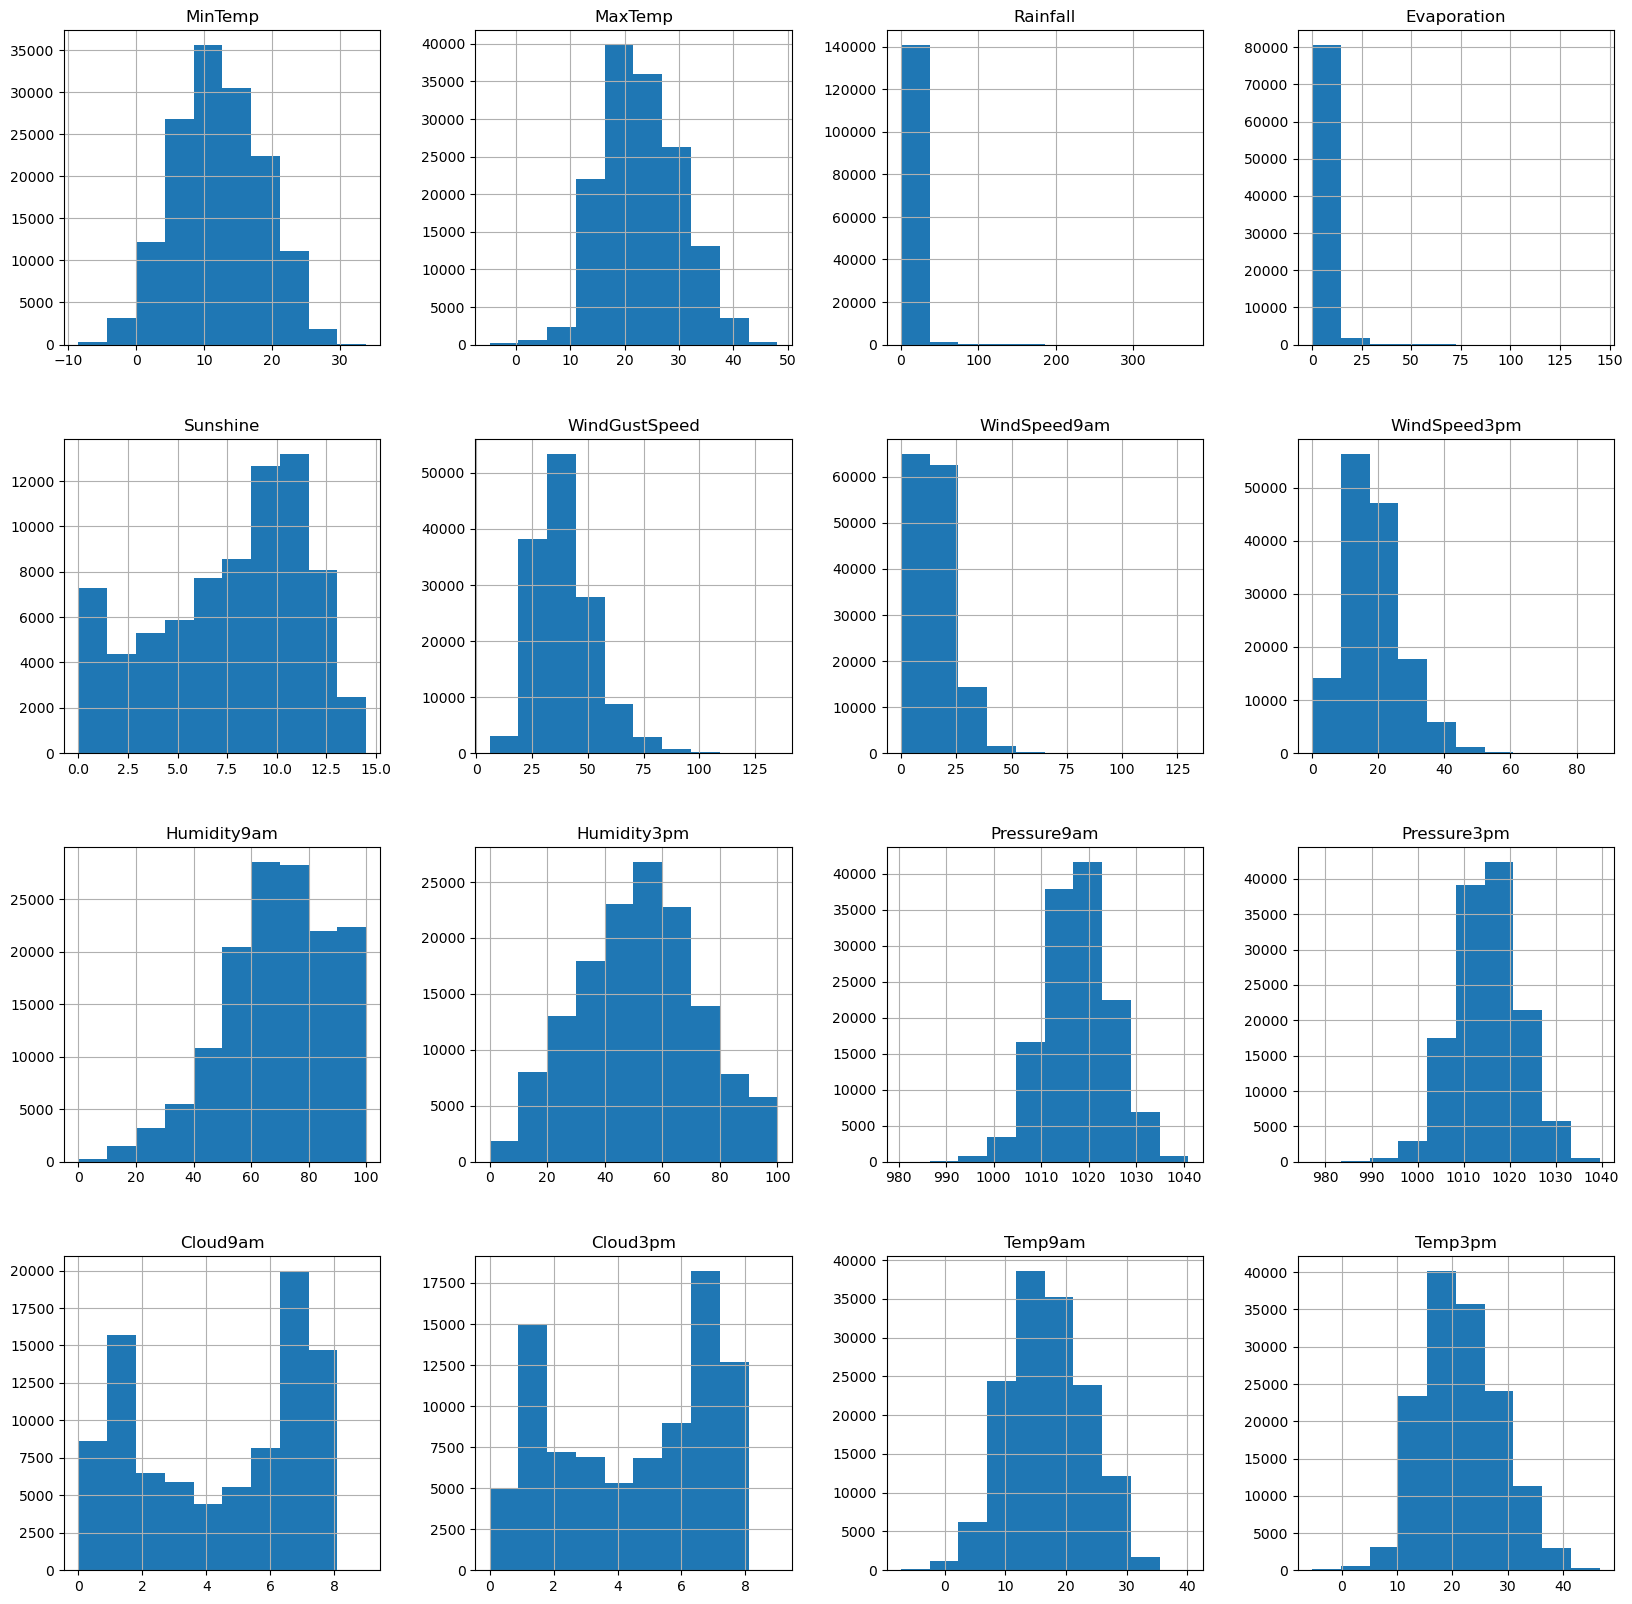

In [10]:
# Melihat distribusi pada atribut numerik
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

- Berdasarkan histogram terlihat bahwa beberapa atribut berdistribusi normal, seperti Humidity3pm, MinTemp, Temp9am, sedangkan beberapa atribut memiliki skewness yang tinggi, yaitu atribut Evaporation dan Rainfall.

In [11]:
# Melihat statistik deskriptif dari data yang bertipe numerik
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [12]:
# Melihat statistik deskriptif dari masing-masing atribut yang bertipe object
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [13]:
# Cek apakah ada missing value pada dataset
df.isnull().values.any()

True

In [14]:
# Melihat banyaknya unique values pada masing-masing atribut
for col in df.columns :
    print(col, ':', df[col].nunique())

Date : 3436
Location : 49
MinTemp : 389
MaxTemp : 505
Rainfall : 681
Evaporation : 358
Sunshine : 145
WindGustDir : 16
WindGustSpeed : 67
WindDir9am : 16
WindDir3pm : 16
WindSpeed9am : 43
WindSpeed3pm : 44
Humidity9am : 101
Humidity3pm : 101
Pressure9am : 546
Pressure3pm : 549
Cloud9am : 10
Cloud3pm : 10
Temp9am : 441
Temp3pm : 502
RainToday : 2
RainTomorrow : 2


In [15]:
# Menampilkan unique values pada kolom Location
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [16]:
# Menampilkan unique values pada kolom Date
df['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

## 4. Data Cleaning
***
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

##### Cek duplikat pada datset

In [17]:
df.duplicated().sum()

0

##### Melihat apakah terdapat missing values pada tiap kolom

In [18]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

##### Menampilkan berapa persen missing value pada tiap kolom

In [19]:
miss_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
miss_value

Date               0.0 %
Location           0.0 %
MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

##### Menampilkan visualisasi data yang terdapat missing value

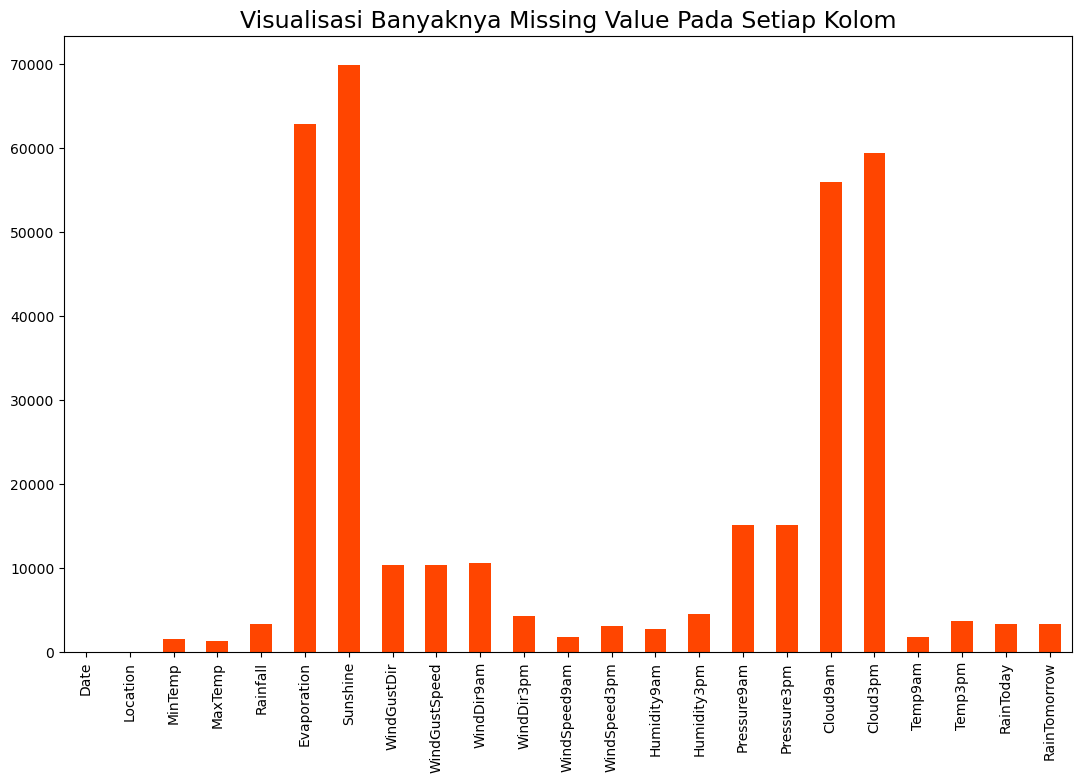

In [20]:
df.isnull().sum().plot.bar(figsize = (13,8), color="orangered")
plt.title("Visualisasi Banyaknya Missing Value Pada Setiap Kolom", fontsize=17)
plt.show()

Imputing missing values dalam fitur kategorik menggunakan modus

In [21]:
categorical_features_with_null = [feature for feature in categorical if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

Menangani missing values dalam fitur numerik

In [22]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

- Missing values dalam fitur numerik dapat diperhitungkan menggunakan Mean dan Median. Mean sensitif terhadap outlier dan median kebal terhadap outlier. Jika ingin menghubungkan missing values dengan Mean, maka outlier dalam fitur numerik perlu ditangani dengan benar.

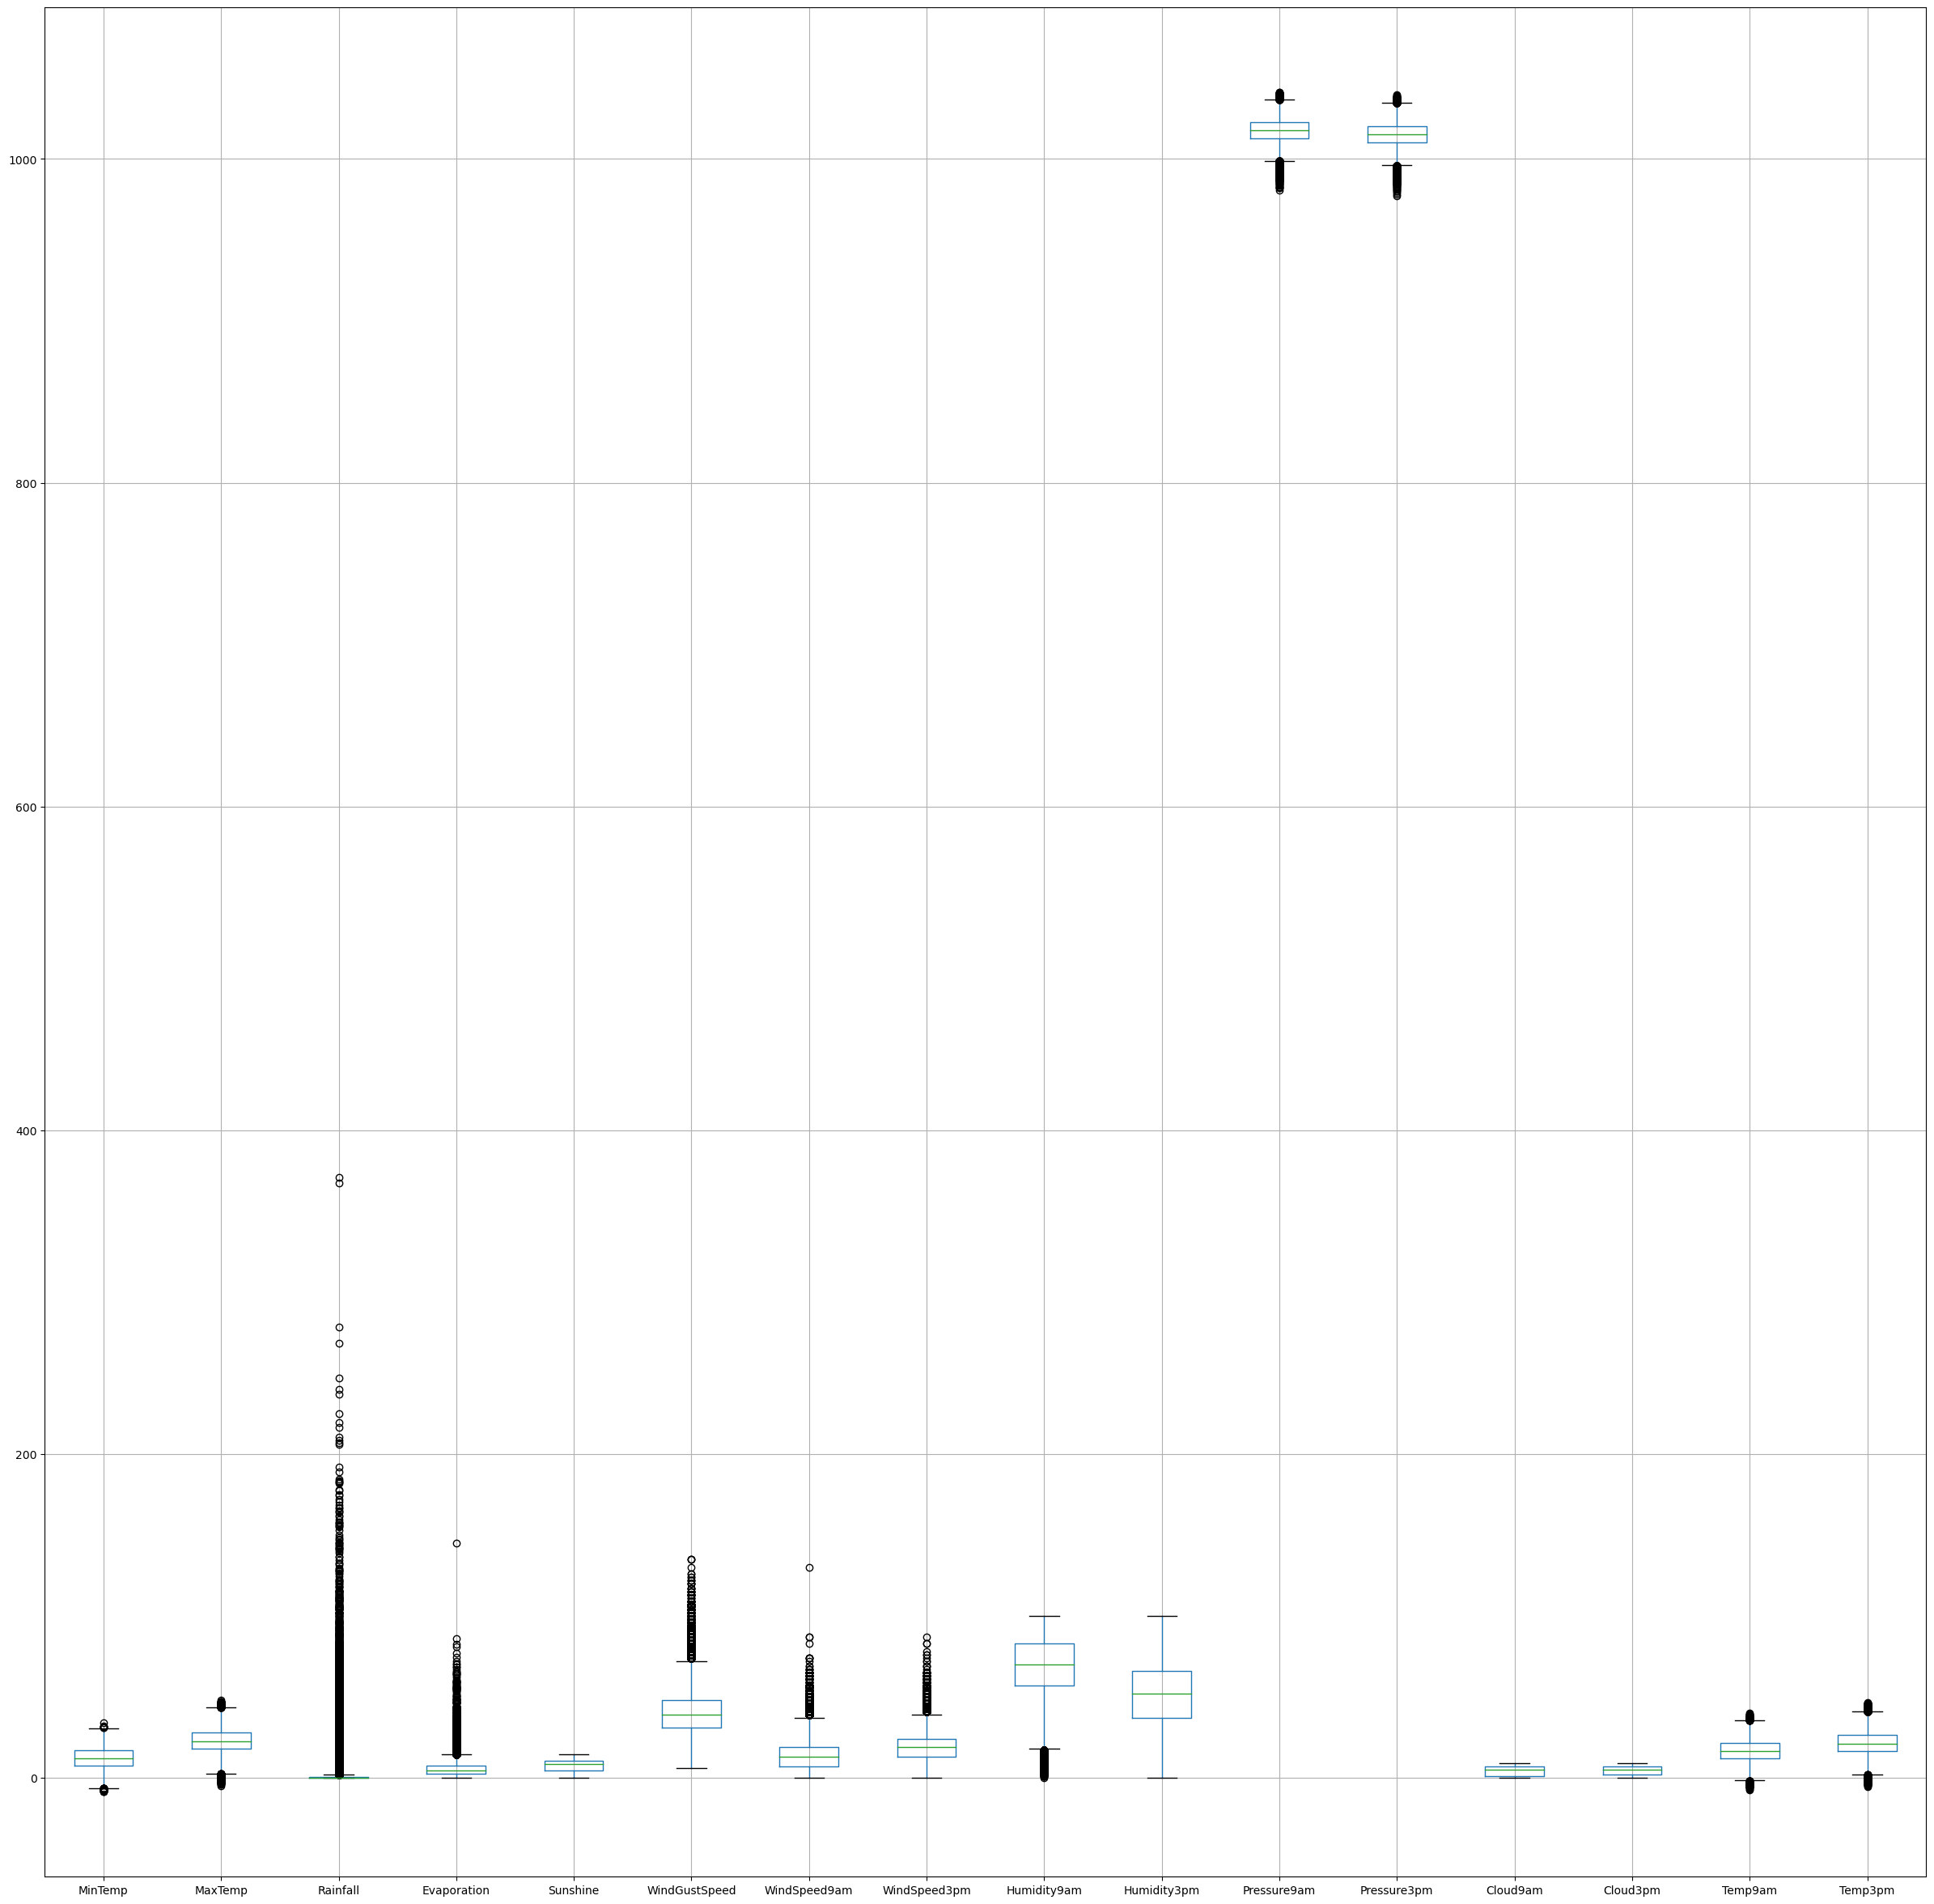

In [23]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

- Boxplot menunjukkan outlier dalam jumlah banyak pada atribut MinTemp, MaxTemp, Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, dan Temp3pm.

Outlier Treatment untuk menghilangkan outlier dari fitur numerik

In [24]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

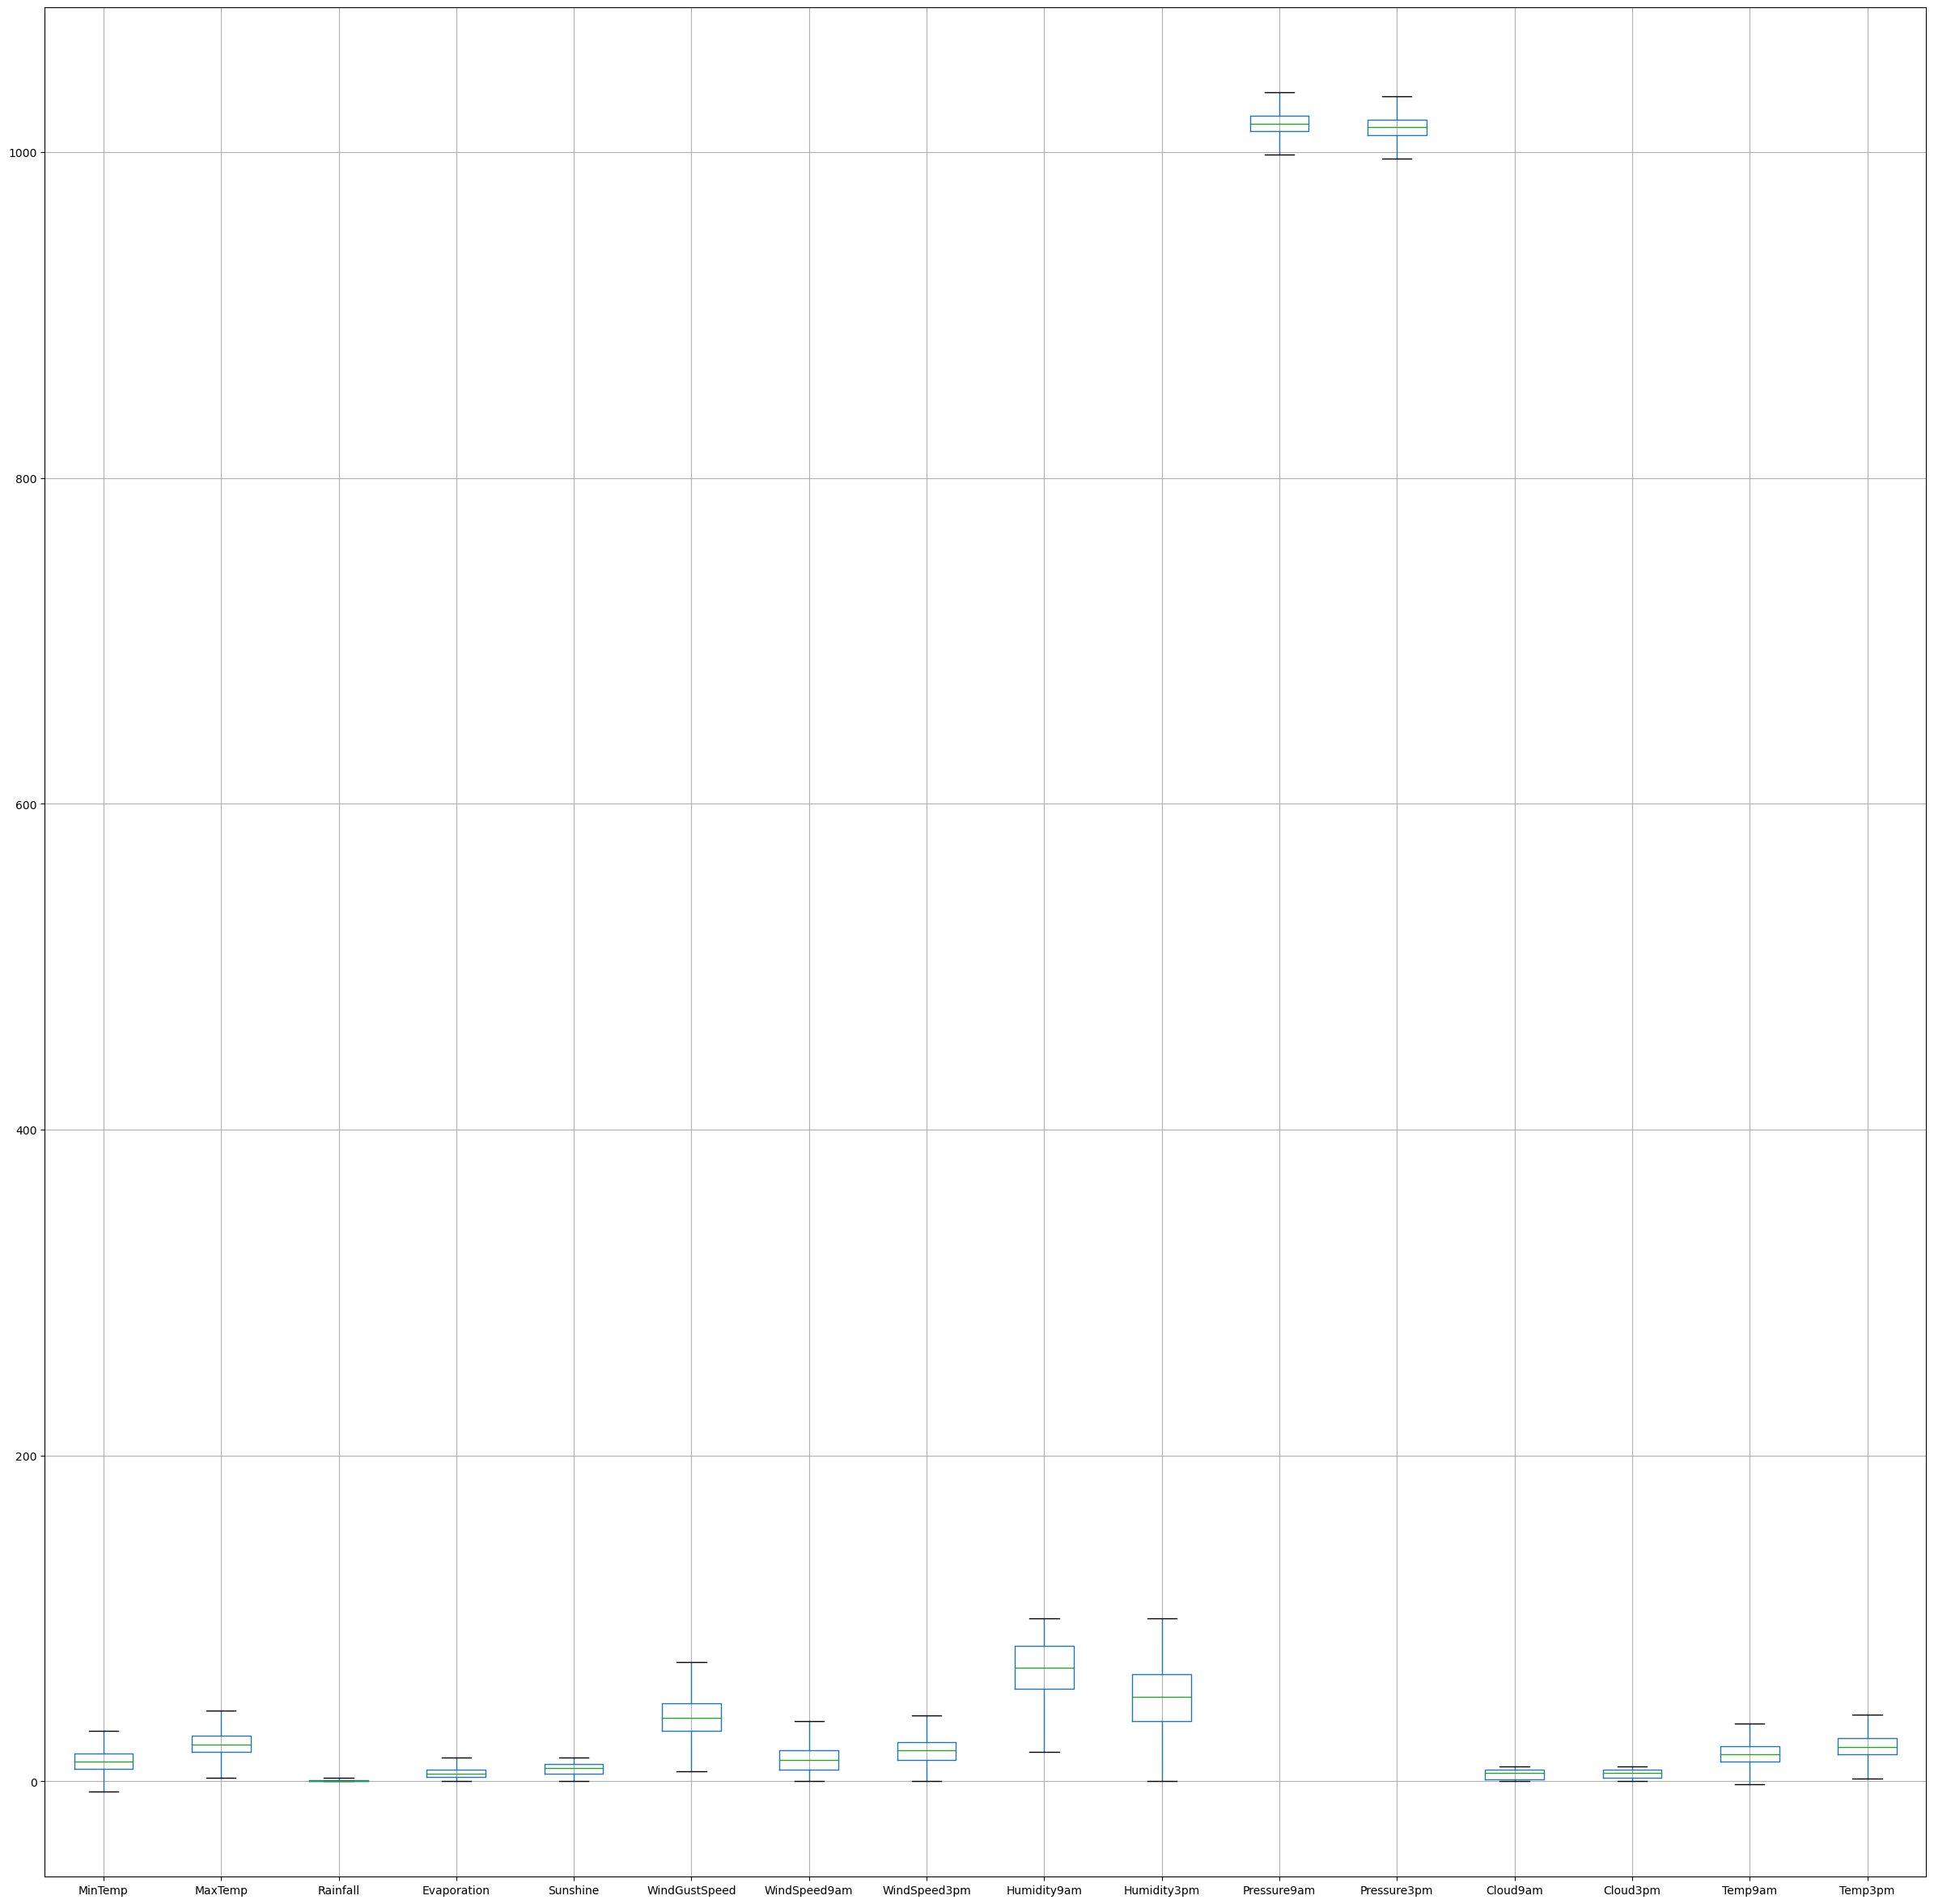

In [25]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

Fitur numerik bebas dari outlier. Hitung nilai missing values dalam fitur numerik menggunakan Mean.

In [26]:
numerical_features_with_null = [feature for feature in numerical if df[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

##### Cek kardinalitas untuk kolom Kategorik :
- Banyak algoritma Machine Leaening seperti Linear Regression, Logistic Regression, k-nearest neighbors, dsb. Hanya dapat menangani data numerik, sehingga encoding data kategorik menjadi numerik menjadi langkah yang diperlukan. Namun sebelum beralih ke encoding, periksa kardinalitas setiap fitur kategorik.
- Kardinalitas: Jumlah nilai unik di setiap fitur kategori dikenal sebagai kardinalitas.
- Fitur kardinalitas tinggi ini menimbulkan banyak masalah serius seperti akan meningkatkan jumlah dimensi data ketika fitur tersebut dikodekan. Ini tidak baik untuk model.
- Ada banyak cara untuk menangani kardinalitas tinggi, salah satunya adalah feature engineering dan yang lainnya hanya dropping fitur tersebut jika tidak menambah value apa pun pada model.

In [27]:
for each_feature in categorical:
   unique_values = len(df[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 16
Cardinality(no. of unique values) of WindDir9am are: 16
Cardinality(no. of unique values) of WindDir3pm are: 16
Cardinality(no. of unique values) of RainToday are: 2
Cardinality(no. of unique values) of RainTomorrow are: 2


- Kolom Date memiliki kardinalitas tinggi yang menimbulkan beberapa masalah pada model dalam hal efisiensi dan juga dimensi data meningkat ketika di-encoding ke data numerik.

##### Feature Engineering pada kolom Date untuk mengurangi Kardinalitas Tinggi

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [29]:
# Drop kolom Date column
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


### Analisis Bi-variate

Sunshine vs Rainfall

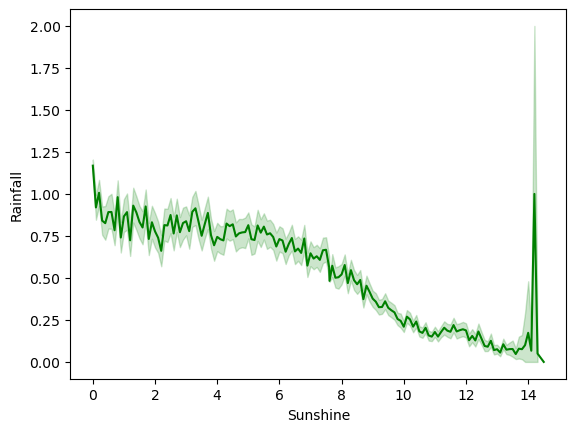

In [30]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green');

- Pada plot garis di atas, atribut Sunshine berbanding terbalik dengan atribut Rainfall.

Sunshine vs Evaporation

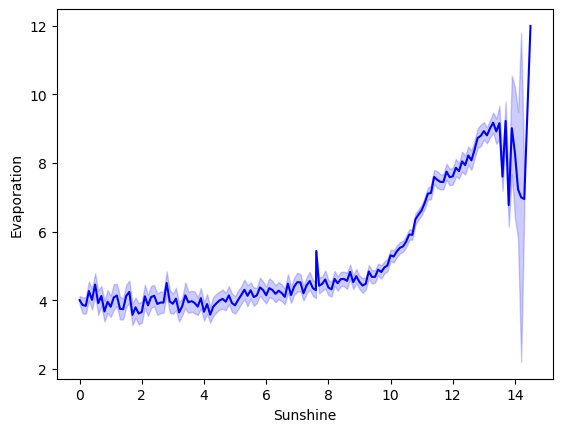

In [31]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='blue');

- Pada plot garis di atas, atribut Sunshine berbanding lurus dengan atribut Evaporation.

##### Membuat kolom atau atribut baru
disini kami membuat atribut atau kolom baru yaitu **TempDifference** yaitu selisih temperature, yang didapatkan dengan menghitung **MaxTemperature** dikurang dengan **MinTemperature**

In [32]:
df['TempDifference'] = df['MaxTemp'] - df['MinTemp']

# Melihat data setelah ditambahkan atribut / kolom baru
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day,TempDifference
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1,9.5
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2,17.7
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3,12.8
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4,18.8
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5,14.8


##### Menghapus kolom yang tidak diperlukan

In [33]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day',
       'TempDifference'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Location        145460 non-null  object 
 1   MinTemp         145460 non-null  float64
 2   MaxTemp         145460 non-null  float64
 3   Rainfall        145460 non-null  float64
 4   Evaporation     145460 non-null  float64
 5   Sunshine        145460 non-null  float64
 6   WindGustDir     145460 non-null  object 
 7   WindGustSpeed   145460 non-null  float64
 8   WindDir9am      145460 non-null  object 
 9   WindDir3pm      145460 non-null  object 
 10  WindSpeed9am    145460 non-null  float64
 11  WindSpeed3pm    145460 non-null  float64
 12  Humidity9am     145460 non-null  float64
 13  Humidity3pm     145460 non-null  float64
 14  Pressure9am     145460 non-null  float64
 15  Pressure3pm     145460 non-null  float64
 16  Cloud9am        145460 non-null  float64
 17  Cloud3pm  

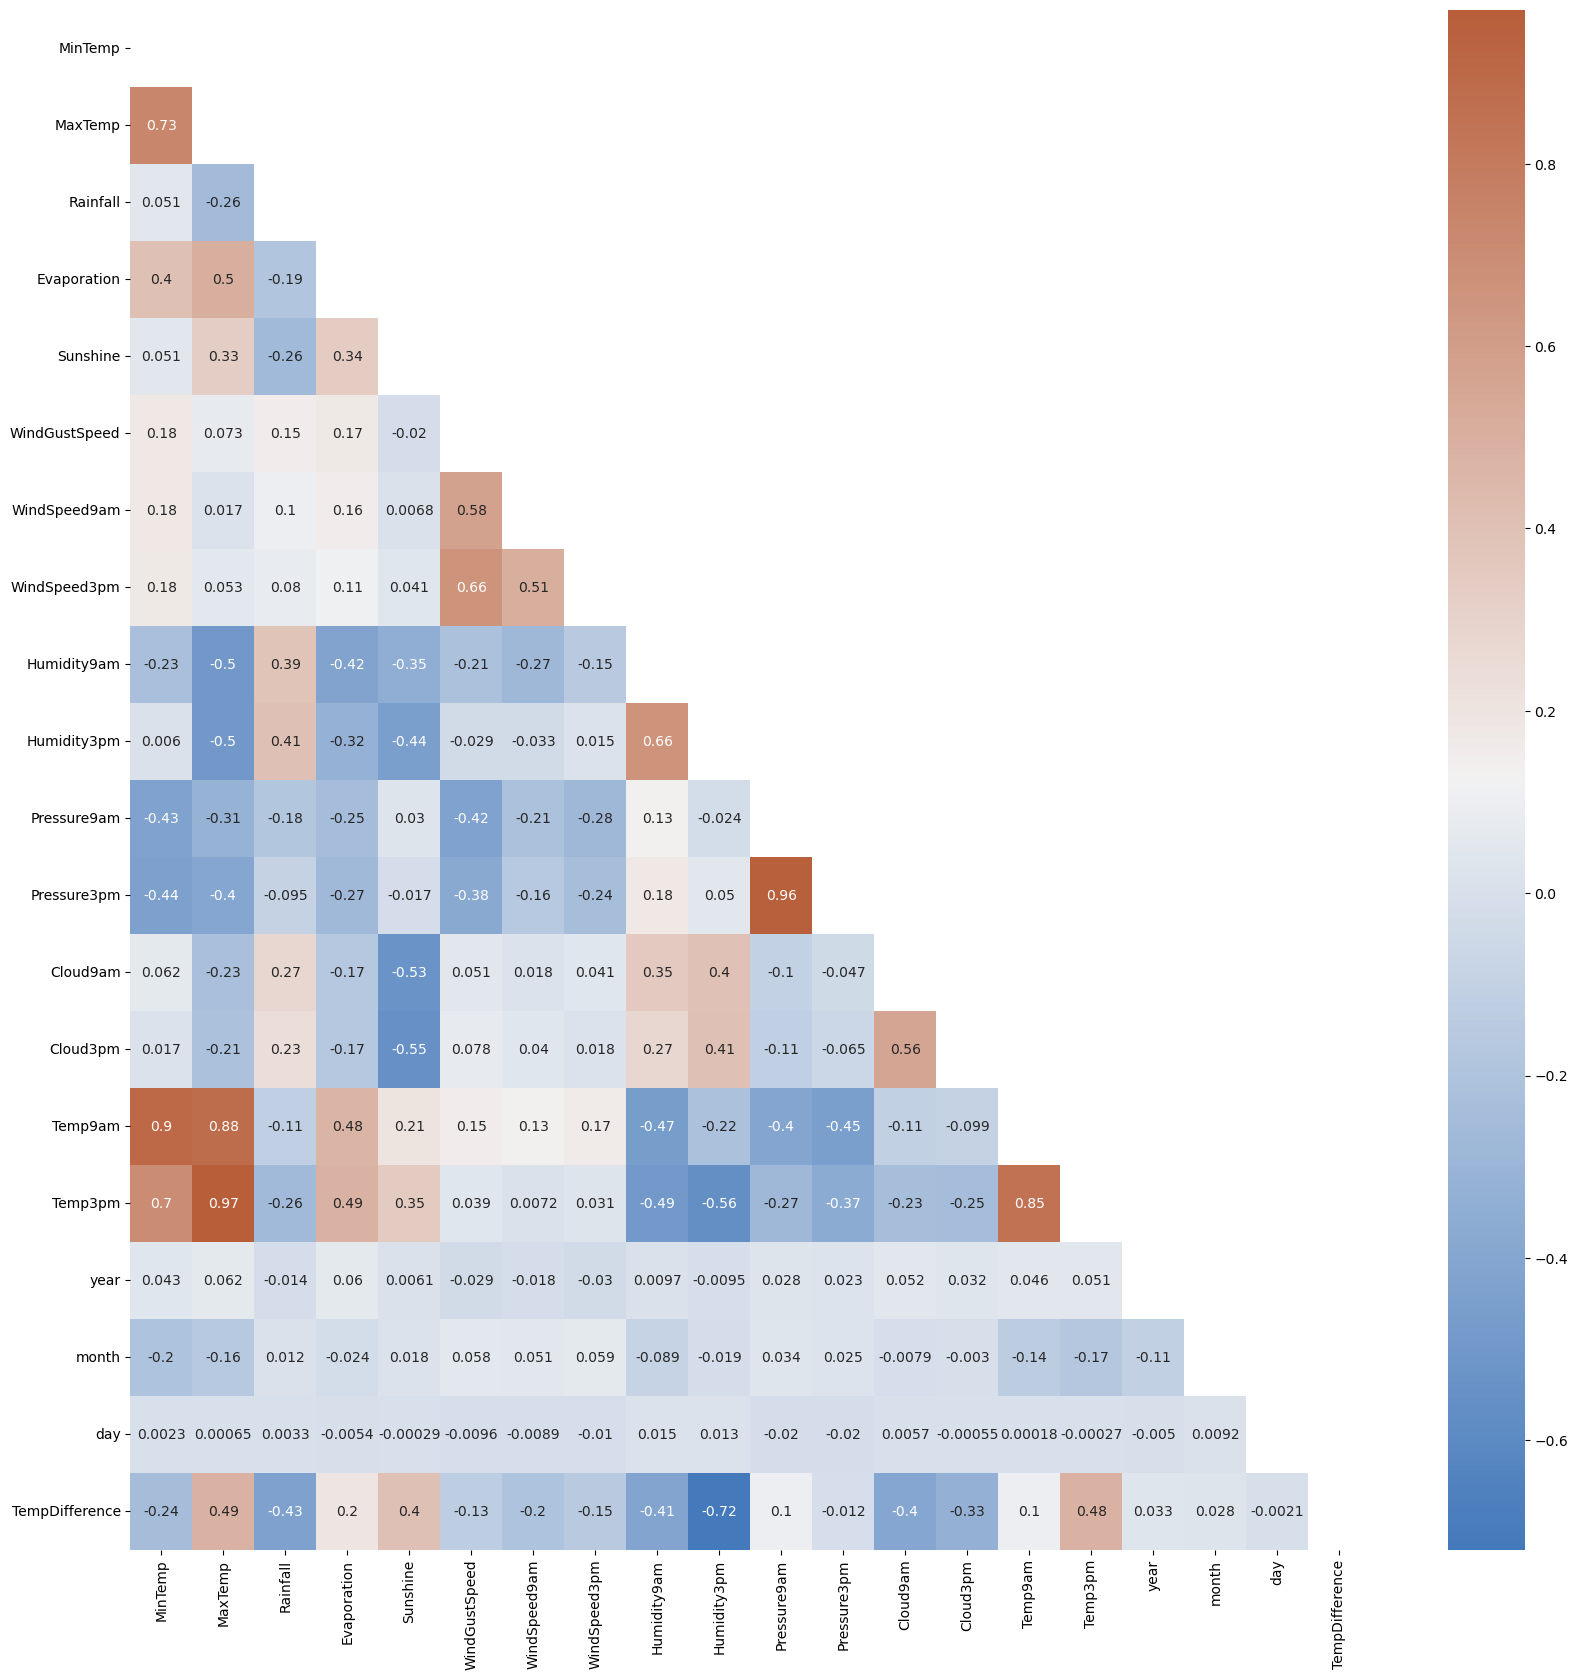

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(250, 25, as_cmap=True), mask=np.triu(df.corr()));

- fitur 'MaxTemp', 'Temp9am', dan 'Temp3pm' memiliki korelasi yang cukup tinggi dan untuk fitur 'Sunshine' memiliki korelasi yang rendah tetapi tidak linier. Oleh karena itu, lebih baik drop fitur-fitur tersebut. Sedangkan fitur 'Evaporation' tidak drop karena meskipun memiliki korelasi yang tinggi namun memiliki korelasi yang linier. 

In [36]:
# Drop kolom yang disebutkan diatas
df.drop(columns=['MaxTemp', 'Sunshine', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)
df

,Location,MinTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day,TempDifference
0,Albury,13.4,0.6,5.318667,W,44.000000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,No,No,2008,12,1,9.500000
1,Albury,7.4,0.0,5.318667,WNW,44.000000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,No,No,2008,12,2,17.700000
2,Albury,12.9,0.0,5.318667,WSW,46.000000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,No,No,2008,12,3,12.800000
3,Albury,9.2,0.0,5.318667,NE,24.000000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,No,No,2008,12,4,18.800000
4,Albury,17.5,1.0,5.318667,W,41.000000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,No,No,2008,12,5,14.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,0.0,5.318667,E,31.000000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,No,No,2017,6,21,20.600000
145456,Uluru,3.6,0.0,5.318667,NNW,22.000000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,No,No,2017,6,22,21.700000
145457,Uluru,5.4,0.0,5.318667,N,37.000000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,No,No,2017,6,23,21.500000
145458,Uluru,7.8,0.0,5.318667,SE,28.000000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,No,No,2017,6,24,19.200000


In [37]:
df.isna().sum()

Location          0
MinTemp           0
Rainfall          0
Evaporation       0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
RainToday         0
RainTomorrow      0
year              0
month             0
day               0
TempDifference    0
dtype: int64

In [38]:
df.isnull().values.any()

False

##### Melakukan rename kolom dari dataset

In [39]:
df = df.rename(columns={
    'MinTemp':'MinTemperature', 
    'WindGustSpeed':'WindSpeed'})

df.head()

,Location,MinTemperature,Rainfall,Evaporation,WindGustDir,WindSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day,TempDifference
0,Albury,13.4,0.6,5.318667,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,No,No,2008,12,1,9.5
1,Albury,7.4,0.0,5.318667,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,No,No,2008,12,2,17.7
2,Albury,12.9,0.0,5.318667,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,No,No,2008,12,3,12.8
3,Albury,9.2,0.0,5.318667,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,No,No,2008,12,4,18.8
4,Albury,17.5,1.0,5.318667,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,No,No,2008,12,5,14.8


##### Melihat banyaknya nilai dari setiap atribut

In [40]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('='*70)

Location : 
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown  

#### ANALISIS
Dari hasil pengecekan, dapat diketahui bahwa nilai missing value terdapat pada beberapa kolom dengan jumlah yang berbeda - beda. Pada visualisasi banyaknya missing value dapat dilihat pada kolom *Evaporation, Sunshine, Cloud9am dan Cloud3am* memiliki data yang paling banyak missing value. Kami mengisi missing value dengan median untuk data yang bertipe numerical dan pada kolom categorical ditangani dengan modus. Dan pada bagian ini, kami menghapus bagian kolom yang tidak diperlukan juga untuk dilakukan prediksi serta membuat kolom atau atribut baru yaitu `TempDifference` atau selisih temperature, yang didapatkan dengan menghitung `MaxTemperature` dikurang dengan `MinTemperature`.

## 5. Explorasi Data
***
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

In [41]:
# Binary encode untuk fitur RainToday dan RainTomorrow
df['RainToday'] = df['RainToday'].replace({1:'Yes',0:'No'})
df['RainTomorrow'] = df['RainTomorrow'].replace({1:'Yes',0:'No'})

##### Melihat proporsi data pada kolom Location dan RainToday dengan menggunakan crosstab

In [42]:
pd.crosstab(df.RainToday, df.Location)

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
RainToday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,2504,2138,2423,2796,2426,2259,2478,2484,2090,2807,2623,2140,2088,2341,2265,2431,1313,2340,2557,2356,2682,2615,2119,2221,2308,1336,2196,2090,2417,2504,2444,2548,2442,1915,2449,2366,2529,2478,2235,2520,2471,1462,2473,2057,2271,2309,2130,2327,2807
Yes,689,902,617,244,583,781,562,709,950,629,386,869,921,852,775,762,265,700,636,653,327,394,921,819,731,242,808,919,592,505,595,645,567,1094,560,643,472,866,774,520,568,116,536,949,738,700,879,713,202


**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa seluruh lokasi lebih sering tidak mengalami hujan di tiap harinya. Adapun lokasi Uluru jarang terjadi hujan, sedangkan di lokasi Portland memiliki perbedaan yang cukup tipis antara hujan dan tidak pada setiap harinya.

##### Melihat Curah hujan tertinggi dan terendah untuk lokasi Canberra

In [43]:
df.loc[df['Location'] == 'Canberra', 'Rainfall'].agg(('min', 'max'))

min    0.0
max    2.0
Name: Rainfall, dtype: float64

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa pada lokasi Canberra (ibu kota Australia) curah hujan terendah yaitu 0.0 dan curah hujan tertinggi yaitu 2.0

##### Melihat perbedaan Tekanan pada jam 9 pagi dan Tekanan pada jam 3 sore terhadap Hujan hari esok

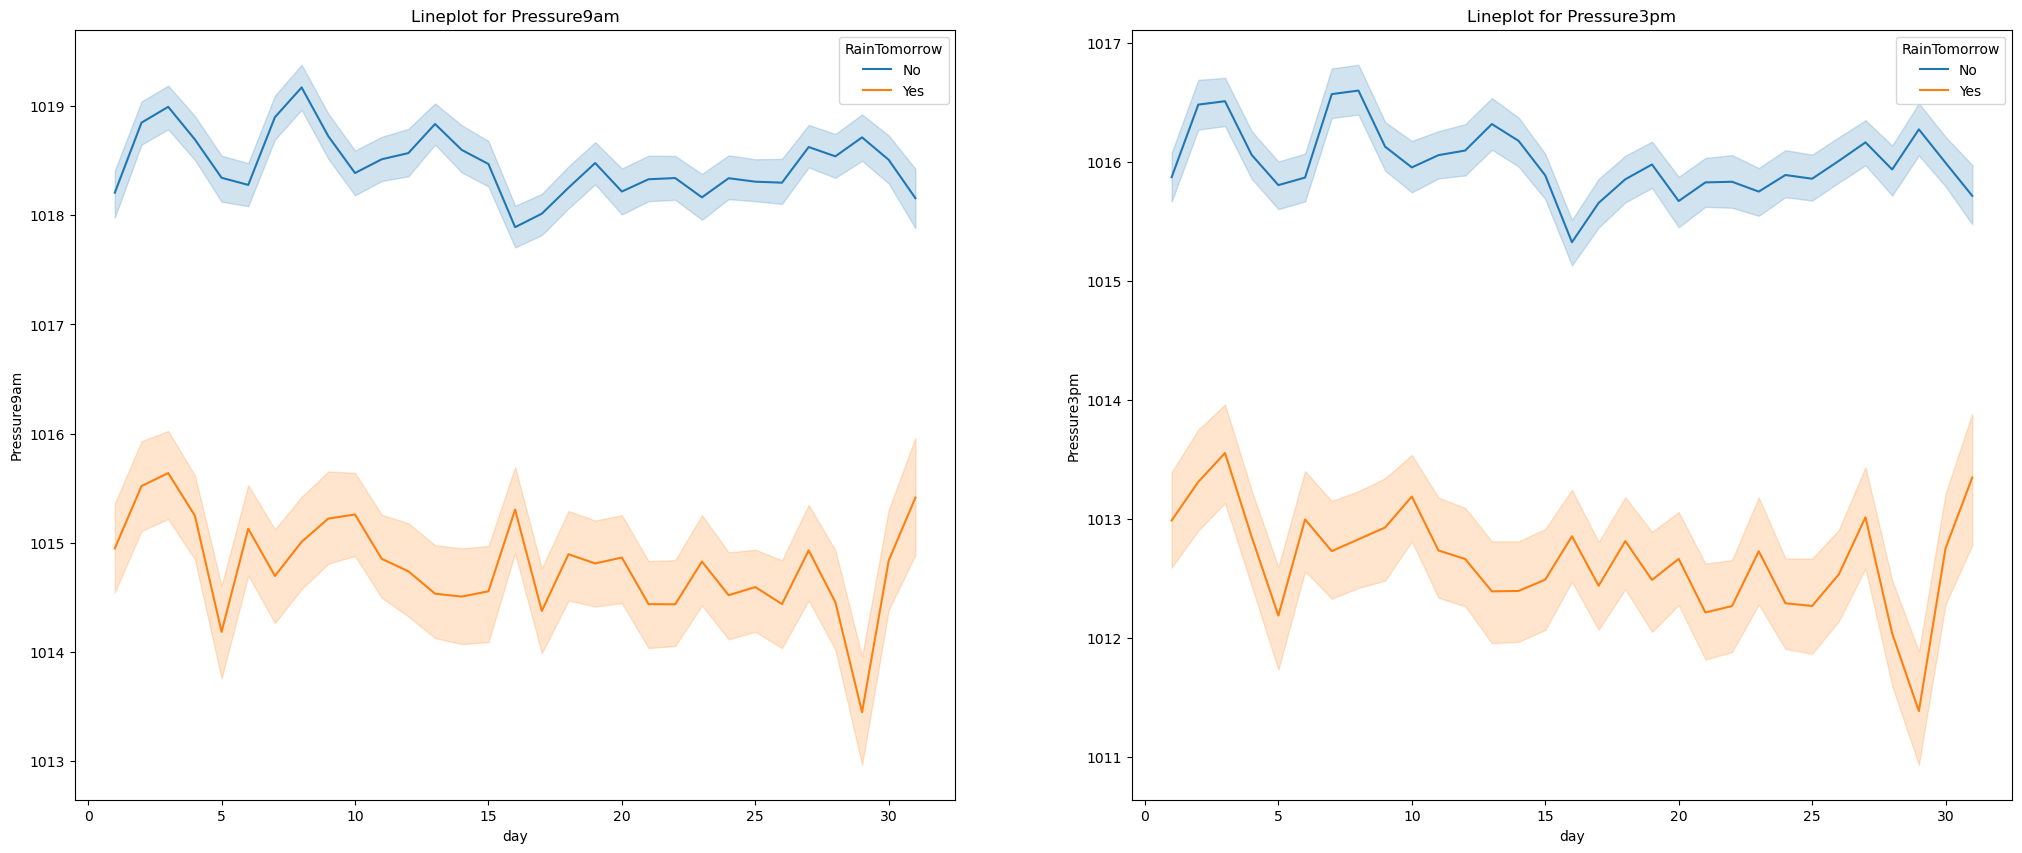

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Pressure9am
sns.lineplot(ax=axes[0],x="day",y="Pressure9am",hue="RainTomorrow",data=df)
axes[0].set_title('Lineplot for Pressure9am')
# Pressure3pm
sns.lineplot(ax=axes[1],x="day",y="Pressure3pm",hue="RainTomorrow",data=df)
axes[1].set_title('Lineplot for Pressure3pm')
plt.show()

- Perbedaan tekanan antara jam 9 pagi dan jam 3 sore rendah maka kemungkinan akan terjadi hujan besok lebih besar.

##### Melihat nilai tertinggi dan terendah pada kecepatan angin (WindSpeed)

In [45]:
df.max(axis=0)['WindSpeed']

73.5

In [46]:
df.min(axis=0)['WindSpeed']

6.0

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa kecepatan angin tertinggi yaitu senilai 73.5km/jam. Sedangkan untuk kecepatan angin terendah didapat dengan nilai 6km/jam.

##### Mengidentifikasi rata-rata hari hujan selama 24 jam (berdasarkan rainfall) dengan melakukan grouping berdasarkan lokasi.

In [47]:
df_mean = df[['Location','Rainfall']].groupby('Location').mean().sort_values(by='Rainfall', ascending=False)
df_mean

,Rainfall
Location,
Portland,0.796721
Walpole,0.703962
NorfolkIsland,0.685120
Dartmoor,0.683099
Cairns,0.677578
MountGambier,0.667824
Witchcliffe,0.644391
Albany,0.642333
CoffsHarbour,0.618705


**Kesimpulan :** Dari hasil dapat dilihat bahwa untuk rata-rata waktu terlama hujan dalam 24 jam adalah pada daerah Portland dengan rata-rata 0.796721 jam, dan waktu tercepat dengan rata-rata 0.153463 jam ada di daerah Woomera.

##### Menampilkan histori top 5 record melakukan query sebagai berikut :
- Lokasi berada di Adelaide.
- Hari di mana turun hujan.
- Kecepatan angin 50km/jam atau lebih

In [48]:
df[
    (df['Location'] == 'Adelaide') &
    (df['RainToday'] == 'Yes') &
    (df['WindSpeed'] >= 50) 
].head()

,Location,MinTemperature,Rainfall,Evaporation,WindGustDir,WindSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day,TempDifference
96329,Adelaide,9.5,2.0,1.200000,WSW,52.0,WSW,SW,24.0,20.0,54.0,66.0,1019.8,1019.6,4.447461,4.50993,Yes,No,2008,7,10,3.6
96351,Adelaide,10.6,1.8,1.800000,SW,73.5,W,WSW,20.0,26.0,58.0,57.0,1010.9,1014.6,4.447461,4.50993,Yes,No,2008,8,1,3.2
96371,Adelaide,8.3,1.4,2.000000,SW,57.0,SSE,SSW,15.0,17.0,64.0,49.0,1021.9,1023.9,4.447461,4.50993,Yes,Yes,2008,8,21,5.1
96381,Adelaide,9.6,2.0,5.318667,WSW,50.0,NW,WSW,20.0,28.0,75.0,58.0,1013.1,1016.3,4.447461,4.50993,Yes,No,2008,8,31,5.6
96396,Adelaide,8.3,2.0,14.400000,W,73.5,WNW,WSW,26.0,33.0,81.0,43.0,1005.2,1009.6,4.447461,4.50993,Yes,No,2008,9,15,6.4


### Visualisasi Pie Chart dan Histogram untuk Persentase Setiap Label Kelas

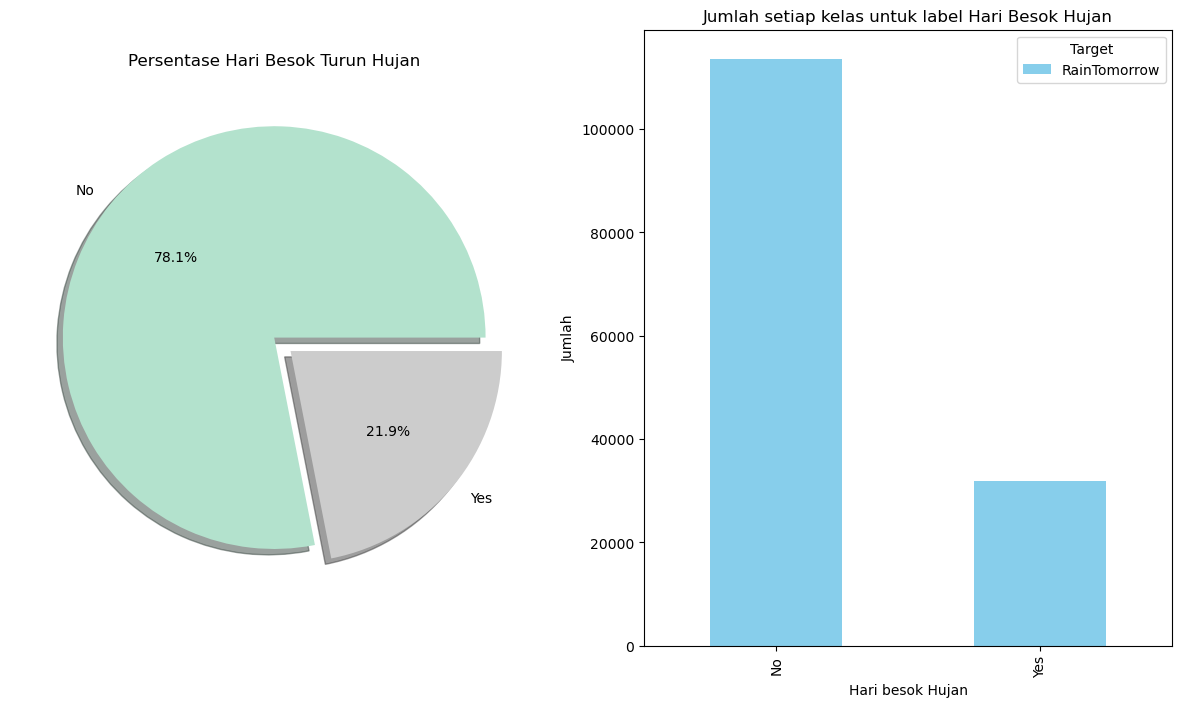

In [49]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

# Pie Chart Persentase "Rain Tomorrow"
df['RainTomorrow'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.1],
    cmap='Pastel2',
    shadow=True
)
ax[0].set_title('Persentase Hari Besok Turun Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1], 
    color='skyblue'
)
ax[1].set_title('Jumlah setiap kelas untuk label Hari Besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')
ax[1].legend(title='Target')

**Kesimpulan :** Dari hasil visualisasi pie chart dan histogram diatas maka dapat dilihat bahwa Persentase 'RainTomorrow' untuk label "Yes" sebesar **21,9%** dan label "No" sebesar **78,1%**. Hal ini berarti terdapat ketidakseimbangan label pada sampel dataset, dimana label "No" 3x lebih banyak dibandingkan label "Yes".

### Visualisasi Bar Chart Persentase Rain Tomorrow = Yes Berdasarkan Lokasi

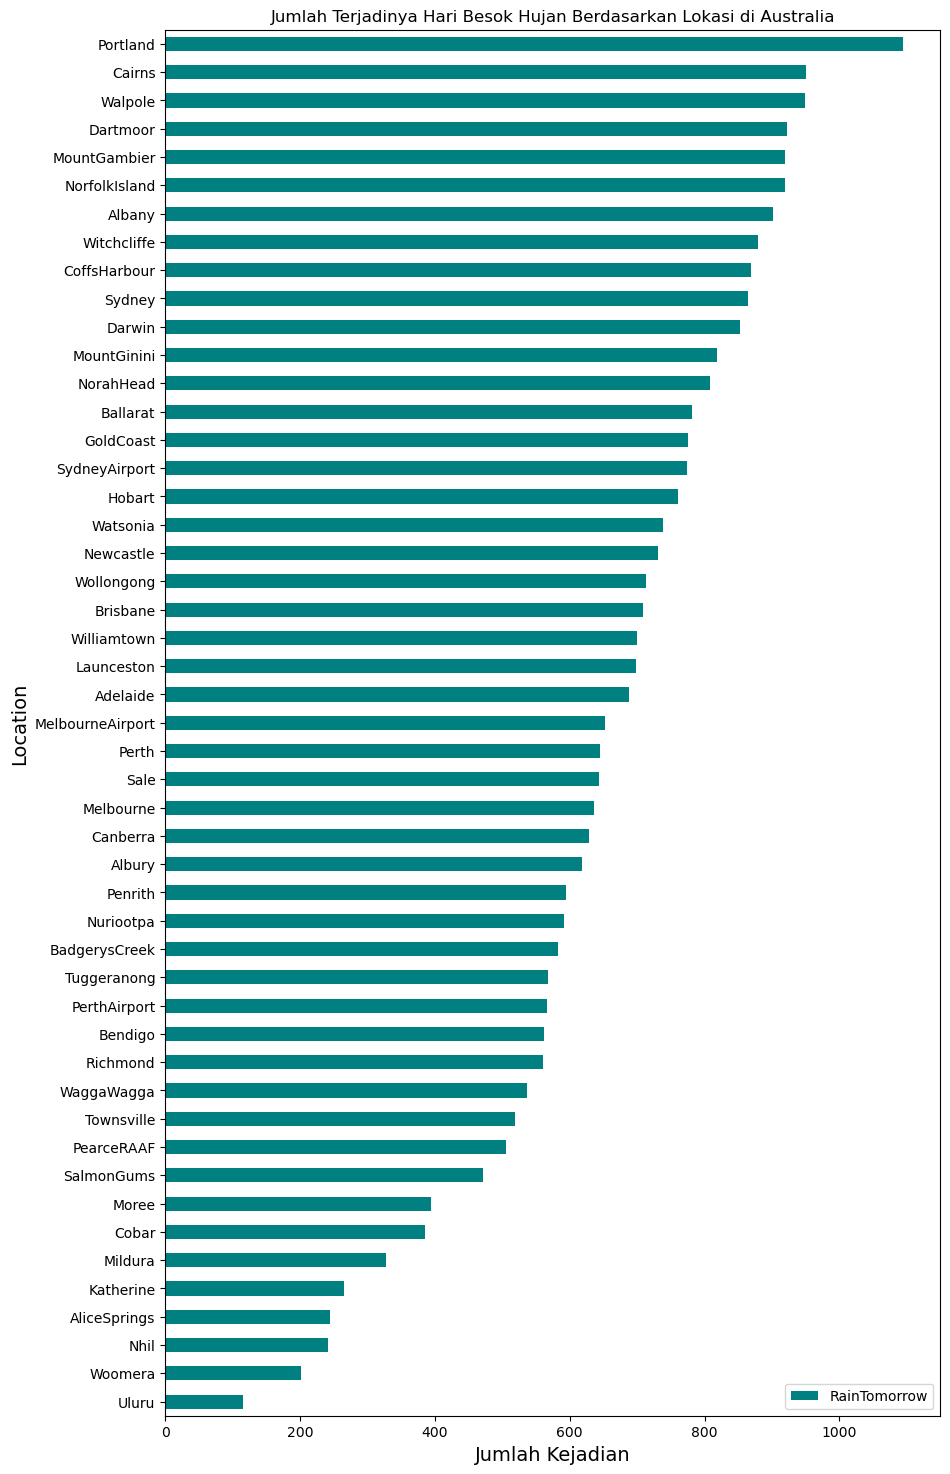

In [50]:
# Kelompokkan data berdasarkan location untuk label 'Yes'
loc_no = df[
    (df['RainTomorrow']=="Yes")
].groupby('Location').agg({'RainTomorrow':'count'}).sort_values(by='RainTomorrow')
loc_no.plot(kind='barh', figsize=(10,18), color=['Teal'])

plt.ylabel("Location", fontsize=14)
plt.xlabel("Jumlah Kejadian", fontsize=14)
plt.title("Jumlah Terjadinya Hari Besok Hujan Berdasarkan Lokasi di Australia")
plt.legend()
plt.show()

**Kesimpulan :** Dari hasil diagram bar chart diatas maka dapat dilihat bahwa untuk location **Portland, Caims, Walpole, Dartmoor, dan MountGambier** menjadi lima kota dengan data kejadian "Rain Tomorrow" berlabel 'Yes' tertinggi. Berarti dapat disimpulkan bahwa pada lokasi tersebut sering terjadi hujan di hari besoknya.

### Visualisasi Bar Chart Persentase Rain Tomorrow = No Berdasarkan Lokasi

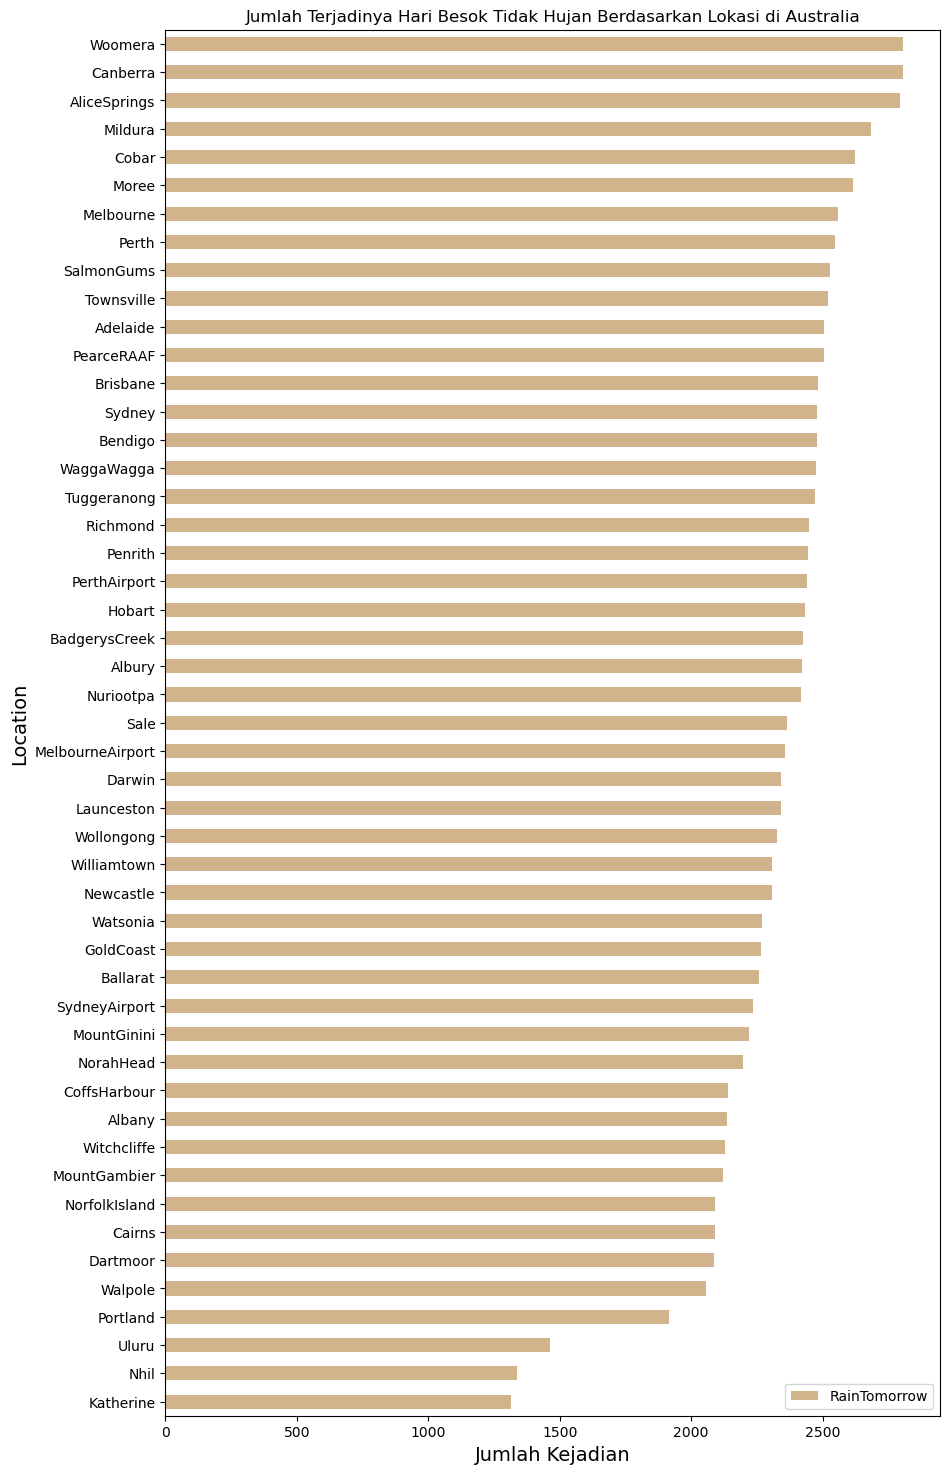

In [51]:
# Kelompokkan data berdasarkan location untuk label 'No'
loc_no = df[
    (df['RainTomorrow']=="No")
].groupby('Location').agg({'RainTomorrow':'count'}).sort_values(by='RainTomorrow')
loc_no.plot(kind='barh', figsize=(10,18), color=['Tan'])

plt.ylabel("Location", fontsize=14)
plt.xlabel("Jumlah Kejadian", fontsize=14)
plt.title("Jumlah Terjadinya Hari Besok Tidak Hujan Berdasarkan Lokasi di Australia")
plt.legend()
plt.show()

**Kesimpulan :** Dari hasil diagram bar chart diatas maka dapat dilihat bahwa untuk location **Canberra, Woomera, AliceSprings, Mildura, dan Cobar** menjadi lima kota dengan data kejadian "Rain Tomorrow" berlabel 'No' tertinggi. Berarti dapat disimpulkan bahwa pada lokasi tersebut jarang terjadi hujan di hari besoknya.

### Visualisasi Box Plot Perbandingan perbandingan Rain Tomorrow berdasarkan Min Temperature

Text(0.5, 1.0, 'Hujan Besok vs Suhu Minimum')

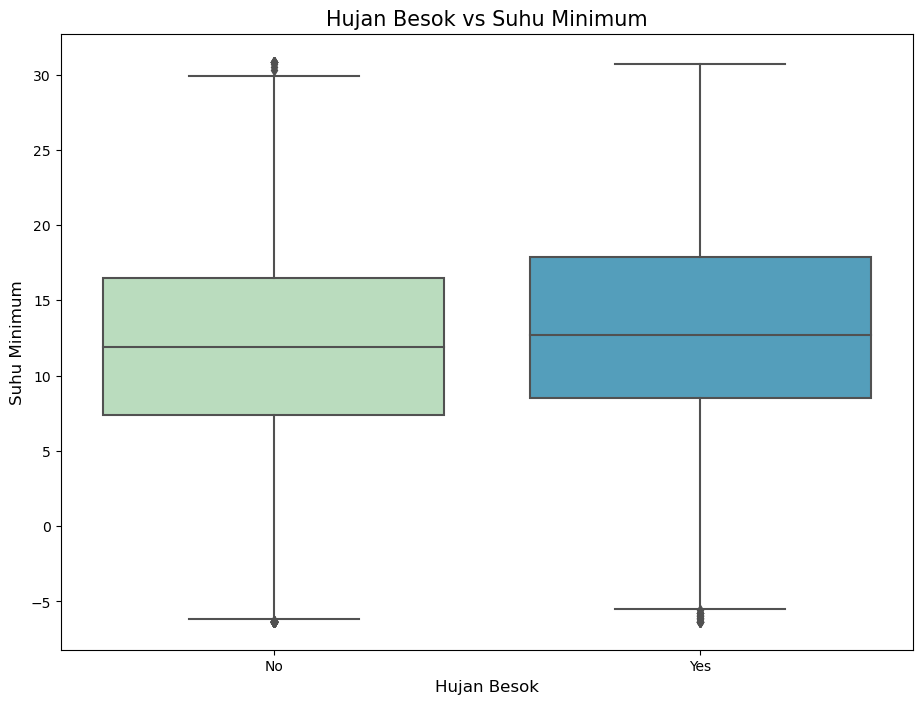

In [52]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(x='RainTomorrow', y='MinTemperature', data=df, palette="GnBu");

plt.xlabel("Hujan Besok", fontsize= 12)
plt.ylabel("Suhu Minimum", fontsize= 12)
plt.title("Hujan Besok vs Suhu Minimum", fontsize= 15)

**Kesimpulan :** Dari hasil visualisasi box plot diatas maka dapat dilihat bahwa label 'Yes' memiliki jangkauan yang sedikit lebih jauh dengan label 'No' serta outlier label 'No' lebih banyak daripada label 'Yes'.

### Visualisasi Korelasi Antar Variabel Untuk Melihat Hubungan

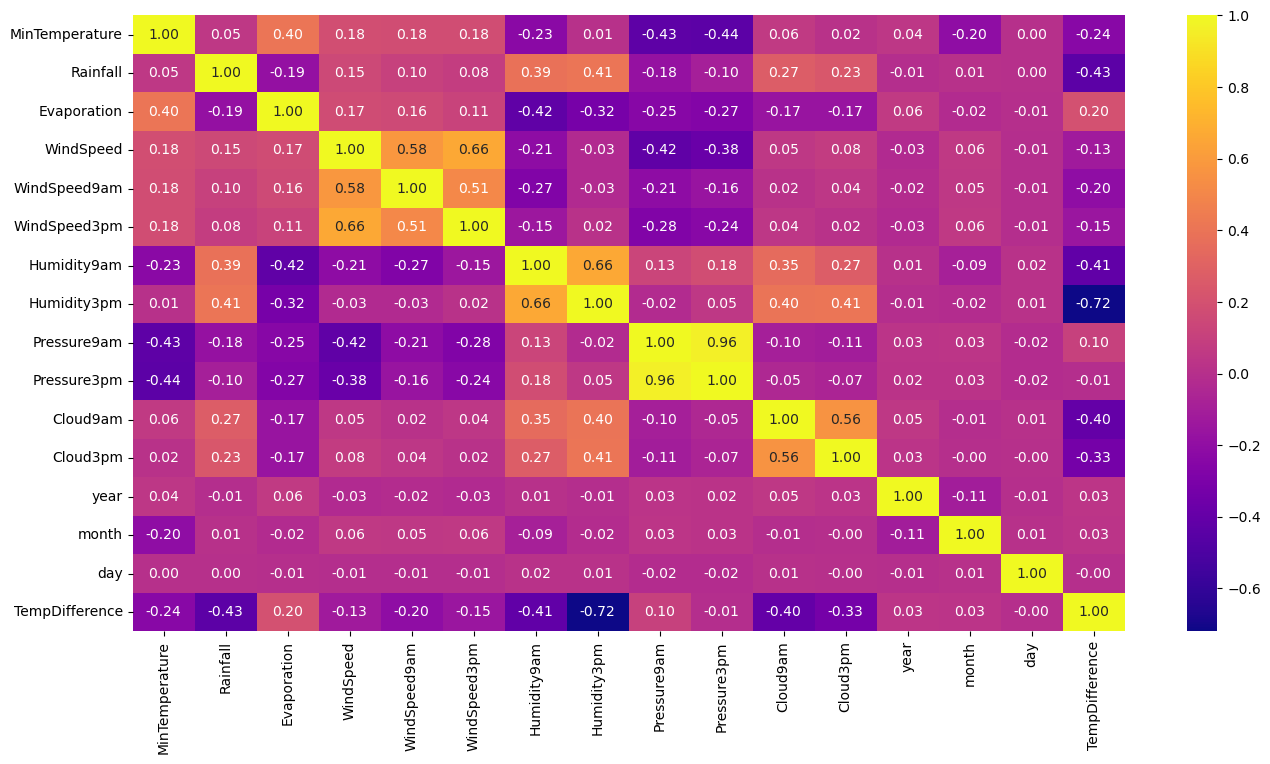

In [53]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.show()

Dari hasil visualisasi matrix korelasi, maka dapat disimpulkan : <br>
- Humidity9am dan Humidity3pm memiliki korelasi yang tinggi ke-2 dengan nilai **0.66**
- Cloud9am dan Cloud3pm memiliki korelasi yang masih terbilang cukup tinggi dengan nilai **0.56**
- Humidity3pm memiliki korelasi rendah terhadap TempDifference yaitu **-0.72**

## 6. Data Preprocessing
***
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Encode
Encoding fitur kategorik menggunakan replace function pada atribut bertipe Object.

In [54]:
# Extract kolom categorical 
cat_col = df.select_dtypes(object).columns.tolist()
len(cat_col)

6

In [55]:
# Mengonversi nilai yang dikategorikan menjadi nilai numerik
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Location        145460 non-null  int32  
 1   MinTemperature  145460 non-null  float64
 2   Rainfall        145460 non-null  float64
 3   Evaporation     145460 non-null  float64
 4   WindGustDir     145460 non-null  int32  
 5   WindSpeed       145460 non-null  float64
 6   WindDir9am      145460 non-null  int32  
 7   WindDir3pm      145460 non-null  int32  
 8   WindSpeed9am    145460 non-null  float64
 9   WindSpeed3pm    145460 non-null  float64
 10  Humidity9am     145460 non-null  float64
 11  Humidity3pm     145460 non-null  float64
 12  Pressure9am     145460 non-null  float64
 13  Pressure3pm     145460 non-null  float64
 14  Cloud9am        145460 non-null  float64
 15  Cloud3pm        145460 non-null  float64
 16  RainToday       145460 non-null  int32  
 17  RainTomorr

In [56]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow'].astype('int64')

print(X.shape)
print(y.shape)

(145460, 21)
(145460,)


In [57]:
df

,Location,MinTemperature,Rainfall,Evaporation,WindGustDir,WindSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day,TempDifference
0,2,13.4,0.6,5.318667,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,0,0,2008,12,1,9.500000
1,2,7.4,0.0,5.318667,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,0,0,2008,12,2,17.700000
2,2,12.9,0.0,5.318667,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,0,0,2008,12,3,12.800000
3,2,9.2,0.0,5.318667,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,0,0,2008,12,4,18.800000
4,2,17.5,1.0,5.318667,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,0,0,2008,12,5,14.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,0.0,5.318667,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,0,0,2017,6,21,20.600000
145456,41,3.6,0.0,5.318667,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,0,0,2017,6,22,21.700000
145457,41,5.4,0.0,5.318667,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,0,0,2017,6,23,21.500000
145458,41,7.8,0.0,5.318667,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,0,0,2017,6,24,19.200000


In [58]:
# Encoding atribut RainTomorrow dan RainToday

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [59]:
df.head()

,Location,MinTemperature,Rainfall,Evaporation,WindGustDir,WindSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day,TempDifference
0,2,13.4,0.6,5.318667,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,0,0,2008,12,1,9.5
1,2,7.4,0.0,5.318667,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,0,0,2008,12,2,17.7
2,2,12.9,0.0,5.318667,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,0,0,2008,12,3,12.8
3,2,9.2,0.0,5.318667,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,0,0,2008,12,4,18.8
4,2,17.5,1.0,5.318667,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,0,0,2008,12,5,14.8


### Feature Selection

Bagian ini berisi proses memilih fitur yang paling berpengaruh terhadap model.

In [60]:
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

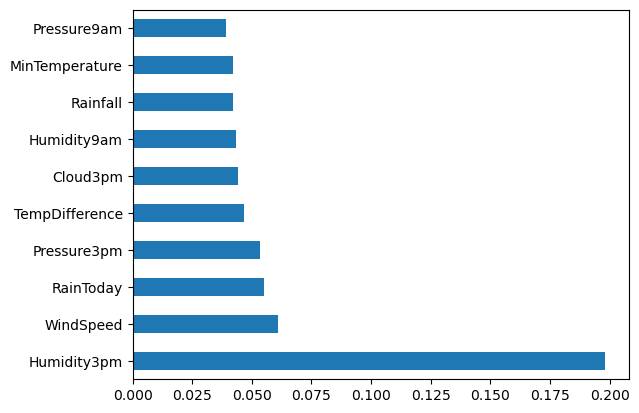

In [61]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh');

In [62]:
data = pd.read_csv("weatherAUS.csv")
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow'] 

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
X_new = bestfeatures.fit_transform(X, y)
names = X.columns.values[bestfeatures.get_support()]
scores = bestfeatures.scores_[bestfeatures.get_support()]
names_scores = list(zip(names, scores))
df_column = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
df_column

,Feat_names,F_Scores
0,Rainfall,17330.062216
1,WindSpeed,7293.826230
2,Humidity9am,9883.853497
3,Humidity3pm,33599.034638
4,Pressure9am,8092.724047
5,Pressure3pm,6749.832257
6,Cloud9am,9695.384640
7,Cloud3pm,14181.363773
8,RainToday,14999.484212
9,TempDifference,17714.266506


Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training.

Dalam hal ini dipilih 10 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan, yaitu atribut Rainfall, RainToday, Humidity3pm, Humidity9am, Cloud9am, Cloud3pm, Pressure9am, Pressure3pm, WindSpeed, dan TempDifference.

In [63]:
X_fit = df[['Rainfall','RainToday', 'Humidity3pm','Humidity9am', 'Cloud9am','Cloud3pm','Pressure9am', 'Pressure3pm', 'WindSpeed','TempDifference']]
X_fit.head()

,Rainfall,RainToday,Humidity3pm,Humidity9am,Cloud9am,Cloud3pm,Pressure9am,Pressure3pm,WindSpeed,TempDifference
0,0.6,0,22.0,71.0,8.000000,4.50993,1007.7,1007.1,44.0,9.5
1,0.0,0,25.0,44.0,4.447461,4.50993,1010.6,1007.8,44.0,17.7
2,0.0,0,30.0,38.0,4.447461,2.00000,1007.6,1008.7,46.0,12.8
3,0.0,0,16.0,45.0,4.447461,4.50993,1017.6,1012.8,24.0,18.8
4,1.0,0,33.0,82.0,7.000000,8.00000,1010.8,1006.0,41.0,14.8


### Model Defining
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

Membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2.

In [64]:
# Melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2,random_state=46)

In [65]:
# Scale dan Transform X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7. Pendefinisian Model
***
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.

a . Model pertama menggunakan algoritma Logistic Regression 

Kami mulai membuat instance dari model yang menyetel nilai default. Kami menentukan kebalikan dari regularization strength di 10 dan menggunakan tuning hyperparameter l1 agar model menjadi lebih akurat.

In [66]:
model1 = LogisticRegression(C=10, solver='liblinear', random_state=0)

b . Model kedua menggunakan algoritma Support Vector Machine (SVM)

Disini kami menggunakan Randomized PCA dan LinearSVC dengan regularization strength di 10.

In [67]:
model2 = make_pipeline(RandomizedPCA(svd_solver='auto',whiten=True,random_state=46),
               LinearSVC(C=10,random_state=46))

## 8. Pelatihan Model
***
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [68]:
model1.fit(X_train, y_train)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [69]:
model2.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(random_state=46, whiten=True)),
                ('linearsvc', LinearSVC(C=10, random_state=46))])

## 9. Evaluasi Model
***
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model.

#### Logistic Regression

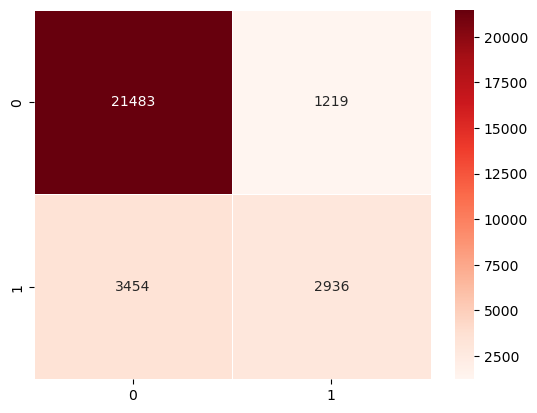

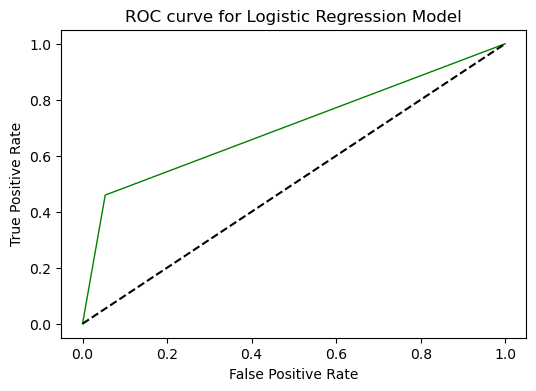

Training accuracy score:  0.8411762683899354
Testing accuracy score:  0.8393716485631789
Cross-validation scores:[0.83883303 0.84205551 0.84085245 0.84075968 0.84273622]
Average cross-validation score: 0.8410473790143209
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22702
           1       0.71      0.46      0.56      6390

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [70]:
y_pred = model1.predict(X_test)

logreg = confusion_matrix(y_test, y_pred)
sns.heatmap(logreg, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show();

print("Training accuracy score: ",model1.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred, y_test))
scores = cross_val_score(model1, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(classification_report(y_test, y_pred))

#### Support Vector Machine (SVM)

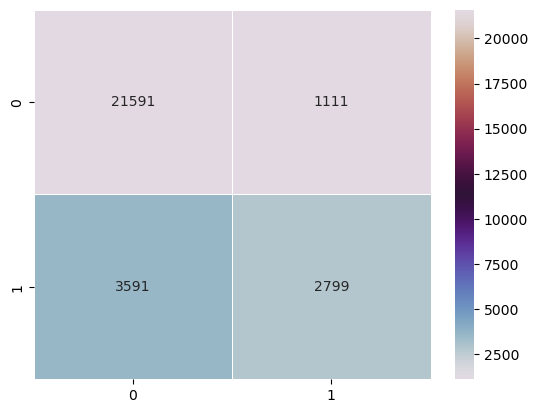

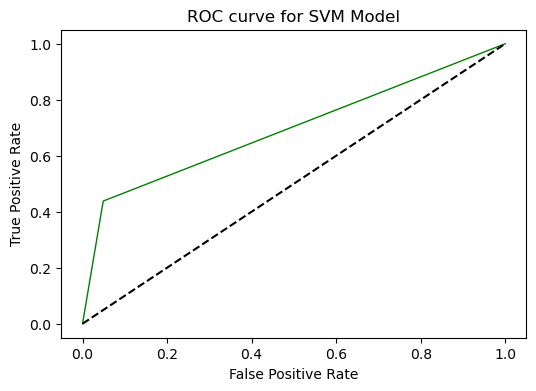

Training accuracy score:  0.8398356936614877
Testing accuracy score:  0.8383748109445895
Cross-validation scores:[0.83750107 0.84149695 0.84025092 0.84058781 0.84067374]
Average cross-validation score: 0.8401020990078862
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22702
           1       0.72      0.44      0.54      6390

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



In [71]:
y_pred2 = model2.predict(X_test)

svm = confusion_matrix(y_test, y_pred2)
sns.heatmap(svm, annot=True, fmt="d", linewidths=.5, cmap = 'twilight')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for SVM Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show();

print("Training accuracy score: ",model2.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred2, y_test))
scores = cross_val_score(model2, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(classification_report(y_test, y_pred2))

Kesimpulan :

- Model Logistic Regression memiliki nilai evaluasi model Recall dan F1 Score yang lebih baik. Akan tetapi  Model SVM memiliki presisi lebih tinggi dibandingkan Model Logistic Regression. Selain itu, akuarasi pada 2 model tidak jauh berbeda.
- Nilai evaluasi dari kedua model tidak berbeda jauh satu sama lain, kedua model cukup baik untuk melakukan prediksi hujan di Australia.

## Percobaan Correcting Imbalanced Dataset (ADDITION)
***
Pada bagian ini, kami melakukan tambahan percobaan untuk handling imbalanced data menggunakan metode oversampling SMOTE

In [72]:
print("Before oversampling: ",Counter(y))

Before oversampling:  Counter({0: 113583, 1: 31877})


In [73]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_fit, y)
print("After oversampling: ",Counter(y_smote))
Xtrain_smote, Xtest_smote, ytrain_smote, ytest_smote = train_test_split(X_smote,y_smote,
                                                                        test_size=0.2, random_state=40 )
mms = MinMaxScaler()
Xtrain_smote = mms.fit_transform(Xtrain_smote)
Xtest_smote = mms.fit_transform(Xtest_smote)

After oversampling:  Counter({0: 113583, 1: 113583})


In [74]:
model_lr = LogisticRegression(solver='liblinear', random_state=1)
model_lr.fit(Xtrain_smote, ytrain_smote)
ypred_lr = model1.predict(Xtest_smote)
print("Accuracy: ", metrics.accuracy_score(ytest_smote, ypred_lr))
print(metrics.confusion_matrix(ytest_smote, ypred_lr))
print(metrics.classification_report(ytest_smote, ypred_lr))

Accuracy:  0.5424792005986706
[[22547    43]
 [20744  2100]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68     22590
           1       0.98      0.09      0.17     22844

    accuracy                           0.54     45434
   macro avg       0.75      0.55      0.43     45434
weighted avg       0.75      0.54      0.42     45434



In [75]:
svm_model2 = LinearSVC(C=10, random_state=46)
svm_model2.fit(Xtrain_smote, ytrain_smote)
ypred_svm = model2.predict(Xtest_smote)
print("Accuracy: ", metrics.accuracy_score(ytest_smote, ypred_svm))
print(metrics.confusion_matrix(ytest_smote, ypred_svm))
print(metrics.classification_report(ytest_smote, ypred_svm))

Accuracy:  0.525597570101686
[[22563    27]
 [21527  1317]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     22590
           1       0.98      0.06      0.11     22844

    accuracy                           0.53     45434
   macro avg       0.75      0.53      0.39     45434
weighted avg       0.75      0.53      0.39     45434



Kesimpulan : 

Dikarenakan variabel target (RainTomorrow) memiliki perbedaan jumlah data yang cukup besar sehingga mengalami imbalance data, kami melakukan percobaan untuk handling imbalanced data menggunakan metode oversampling SMOTE. Tetapi akurasi serta score yang dihasilkan mengalami penurunan drastis

## 10. Model Inference
***
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [76]:
X_new = {'Location':[1,2,3,4,5], 'WindSpeed':[18.35,20.5,14.44,45.8,30.25], 'Humidity9am':[11.9,4.5,12,17,20.6], 
         'Humidity3pm':[15,1.31,2.73,21.4,5.62], 'Cloud9am':[4.55,8,8.23,7.76,3.9], 'Cloud3pm':[5.71,4.32,4.56,7,8], 'Pressure9am':[1010.2,1005,1007.77,1010.92,1009.45], 
         'Pressure3pm':[1007.81,1010.22,1008.33,1009.15,1006.2], 'RainToday':[0,1,0,1,0], 
         'TempDifference':[10.4,17.8,21.7,18.1,14.2]}
X_new = pd.DataFrame(X_new)
X_new.head()


,Location,WindSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Pressure9am,Pressure3pm,RainToday,TempDifference
0,1,18.35,11.9,15.00,4.55,5.71,1010.20,1007.81,0,10.4
1,2,20.50,4.5,1.31,8.00,4.32,1005.00,1010.22,1,17.8
2,3,14.44,12.0,2.73,8.23,4.56,1007.77,1008.33,0,21.7
3,4,45.80,17.0,21.40,7.76,7.00,1010.92,1009.15,1,18.1
4,5,30.25,20.6,5.62,3.90,8.00,1009.45,1006.20,0,14.2


In [77]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

In [78]:
list(X_new)

[array([-1.41421356, -0.66847323, -0.23892861,  0.7479651 , -1.03910759,
        -0.14747338,  0.72557466, -0.39540889, -0.81649658, -1.57244753]),
 array([-0.70710678, -0.47730304, -1.59898377, -1.02115069,  0.81069694,
        -1.13299259, -1.7372114 ,  1.39582312,  1.22474487,  0.35406103]),
 array([ 0.        , -1.01613621, -0.22054949, -0.83764854,  0.93401724,
        -0.962831  , -0.42530421, -0.008919  , -0.81649658,  1.36938311]),
 array([0.70710678, 1.77228097, 0.6984067 , 1.57501703, 0.68201489,
        0.76714517, 1.06657581, 0.60054584, 1.22474487, 0.43216273]),
 array([ 1.41421356,  0.38963151,  1.36005516, -0.4641829 , -1.38762148,
         1.4761518 ,  0.37036513, -1.59204107, -0.81649658, -0.58315935])]

In [79]:
y_pred1 = model1.predict(X_new)
y_pred2 = model2.predict(X_new)
print('Prediksi Hujan: ')
print(y_pred1)
print(y_pred2)

Prediksi Hujan: 
[0 0 0 1 1]
[0 0 0 1 1]


## 11. Pengambilan Kesimpulan
***
Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
- Terdapat 22 atribut yang diasumsikan memengaruhi Hari besok Hujan. Setelah dilakukan analisis, kami mengambil 10 atribut/faktor yang paling berpengaruh dalam model.
- Untuk mengatasi missing value pada analisis ini, kami menggunakan pengisian missing value dengan menggunakan median untuk kolom/atribut bertipe numerical dan modus untuk kolom/atribut bertipe categorical.
- Pada project ini kami menggunakan Model Logistic Regression dan Model SVM.
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan lineplot, boxplot, histogram, pie chart, dan matriks korelasi (heatmap) dan juga melakukan beberapa contoh groupby dan query terhadap data yang ada
- Nilai akurasi dari model logistic regression dan SVM **tidak jauh berbeda**, keduanya memiliki nilai akurasi sebesar kurang lebih 84% yang mana kedua hasil tersebut cukup baik untuk dilakukan prediksi hujan di Australia
- Model *Logistic Regression* mempunyai akurasi sebesar **0.84**, Presisi sebesar **0.71**, Recall sebesar **0.46**, dan F1 Score sebesar **0.56**.
- Model SVM mempunyai akurasi sebesar Akurasi **0.84**, Presisi sebesar **0.72**, Recall sebesar **0.44**, dan F1 Score sebesar **0.54**.
- Dikarenakan variabel target (RainTomorrow) memiliki perbedaan jumlah data yang cukup besar sehingga mengalami imbalance data, kami melakukan percobaan untuk handling imbalanced data menggunakan **metode oversampling SMOTE**. Tetapi akurasi serta score yang dihasilkan mengalami penurunan drastis
- Dari evaluasi model, dapat diketahui bahwa nilai precision lebih besar daripada recall. Hal ini berarti *False Positif bernilai kecil*.
- Karena pada target tidak seimbang, maka evaluasi model yang digunakan adalah F1 Score dan model yang dipilih untuk deployment adalah *Logistic Regression*.